In [1]:
import os 
import glob
import torch
import numpy as np

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

import config
import dataset

In [2]:
print(config.DATA_DIR)
image_files = glob.glob(os.path.join(config.DATA_DIR, "*.png"))
print(len(image_files))    
targets_orig = [x.split("\\")[-1][:-4] for x in image_files]
targets = [[c for c in x] for x in targets_orig]
target_flat = [c for clist in targets for c in clist]

lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(target_flat)
targets_enc = [lbl_enc.transform(x) for x in targets]
targets_enc = np.array(targets_enc) + 1
print(targets_enc)
print(len(lbl_enc.classes_))

train_imgs, test_imgs, train_targets, test_targets, _, test_orig_targets = model_selection.train_test_split(image_files, targets_enc, targets_orig, test_size=0.1, random_state=42)

train_dataset = dataset.Classification(image_paths=train_imgs, targets= train_targets, resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH))
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=config.BATCH_SIZE, num_workers=config.NUM_WORKERS, shuffle=True)


test_dataset = dataset.Classification(image_paths=test_imgs, targets= test_targets, resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH))
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=config.BATCH_SIZE, num_workers=config.NUM_WORKERS, shuffle=False )




../input/captcha_images_v2
1040
[[ 1  1  5 14 10]
 [ 1  1 10  4 15]
 [ 1  2  4  5 13]
 ...
 [19 19  7  1  3]
 [19 19 13  4 13]
 [19 19 15  4  6]]
19


In [3]:
print(targets_orig)

['226md', '22d5n', '2356g', '23mdg', '23n88', '243mm', '244e2', '245y5', '24f6w', '24pew', '25257', '253dc', '25egp', '25m6p', '25p2m', '25w53', '264m5', '268g2', '28348', '28x47', '2b827', '2bg48', '2cegf', '2cg58', '2cgyx', '2en7g', '2enf4', '2fxgd', '2g783', '2g7nm', '2gyb6', '2mg87', '2mpnn', '2n73f', '2nbcx', '2nf26', '2npg6', '2nx38', '2p2y8', '2pfpn', '2w4y7', '2wc38', '2wx73', '2x7bm', '2xc2n', '2ycn8', '2yggg', '325fb', '32cnn', '32dnn', '33b22', '33f7m', '33n73', '33ng4', '33p4e', '34b84', '34fxm', '34pcn', '368y5', '36bc2', '36nx4', '36w25', '373gb', '377xx', '378e5', '37d52', '37ep6', '387g2', '38n57', '3b4we', '3bd8f', '3bfnd', '3bnyf', '3bx86', '3cpwb', '3d7bd', '3den6', '3dgmf', '3ebnn', '3ebpw', '3eny7', '3fbxd', '3g2w6', '3mxdn', '3n2b4', '3n3cf', '3n7mx', '3ndxd', '3nfdn', '3nnpw', '3nw7w', '3ny45', '3p4nn', '3p67n', '3pe4g', '3w2bw', '3wnd3', '3x325', '3x5fm', '3xcgg', '3xng6', '3ye2e', '3ygde', '3ym7f', '428b6', '42dw4', '42nxy', '42xpy', '43gey', '43mn5', '43p5d', 

In [4]:
npimg = train_dataset[0]["images"]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6225708].


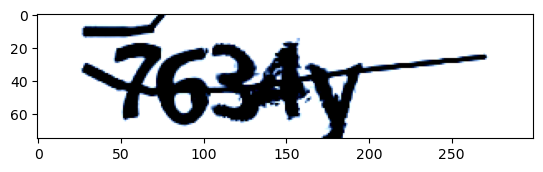

In [5]:
plt.imshow(np.transpose(npimg, (1,2,0)))

In [6]:
from model import CaptchaModel
import engine

In [7]:
def decode_predictions(preds, encoder):
    preds = preds.permute(1,0,2)
    preds = torch.softmax(preds,2)
    preds = torch.argmax(preds, 2)
    preds = preds.detach().cpu().numpy()
    cap_preds = []
    for j in range(preds.shape[0]):
        temp = []
        for k in preds[j, :]:
            k = k - 1
            if k==-1:
                temp.append("*")
            else:
                temp.append(encoder.inverse_transform([k])[0])
        tp = "".join(temp)
        cap_preds.append(tp)
    return cap_preds

In [8]:
print(test_orig_targets)

['4fc36', 'fyfbn', '5mgn4', '2mg87', 'gw53m', 'x2cnn', '7bwm2', '8684m', 'd66cn', 'bd3b7', 'gnbde', 'e667x', 'pgm2e', 'n5w5g', '6n5fd', '3den6', 'n8fp6', 'p6mn8', '88y52', 'fywb8', 'xe6eb', 'ngn26', 'b35f6', 'mggce', 'fp762', 'c3n8x', 'wce5n', '3n7mx', '7y2x4', 'f4wfn', '5dxnm', '63824', 'dmw8n', 'xemyg', 'x74b2', '445cc', 'c6f8g', 'e8e5e', 'e3ndn', '36bc2', 'e72cd', 'm457d', 'm2nf4', '5pm6b', 'nbcgb', 'mpxfb', 'c7gb3', 'defyx', 'x4pnp', '76nxn', '82fx2', '32dnn', 'pwmbn', '43mn5', 'xngxc', 'yd3m3', 'y5n6d', 'xbem6', '25257', 'dbny3', 'dn2ym', 'gm2c2', '3bd8f', 'yyn57', 'fxpw3', '6p7gx', '8nn73', 'be6np', '8db67', 'c55c6', 'dw6mn', '8b735', '4gycb', 'pp546', 'n5cm7', '7w67m', 'wgnwp', '4n2yg', 'yx2d4', 'yeyn4', 'men4f', 'x5f54', '3nfdn', 'p2m6n', '7gp47', '3ye2e', '7pcd7', 'pdcp4', 'cd4eg', '3wnd3', 'nmw46', 'ndg2b', '2gyb6', '55y2m', 'm2576', '33p4e', '2cg58', 'ffd6p', 'mxnw4', 'gbxyy', 'g3dy6', 'f85y3', '5fyem', '23mdg']


In [ ]:
model = CaptchaModel(num_chars=len(lbl_enc.classes_))
model.to(config.DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, factor=0.8, patience=5, verbose=True
)

for epoch in range(config.EPOCHS):
    train_loss = engine.train_fn(model, train_dataloader, optimizer)
    valid_preds, valid_loss = engine.eval_fn(model, test_dataloader)
    valid_cap_preds = []
    for vp in valid_preds:
        current_preds = decode_predictions(vp, lbl_enc)
        valid_cap_preds.extend(current_preds)
    # print(valid_cap_preds)
    pprint(list(zip(test_orig_targets, valid_cap_preds))[6:11])
    print(f"Epoch: {epoch}, train_loss={train_loss}, valid_loss={valid_loss}")
    
    

c:\Users\chand\anaconda3\envs\pytorch\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
100%|██████████| 13/13 [00:05<00:00,  2.29it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 0, train_loss=7.139245163681161, valid_loss=3.3178330201369066


100%|██████████| 13/13 [00:04<00:00,  2.69it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 1, train_loss=3.314894154540494, valid_loss=3.3009824752807617


100%|██████████| 13/13 [00:04<00:00,  2.65it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 2, train_loss=3.2939928393078666, valid_loss=3.2924897487346945


100%|██████████| 13/13 [00:06<00:00,  2.13it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 3, train_loss=3.287223104737763, valid_loss=3.2883069882026086


100%|██████████| 13/13 [00:04<00:00,  2.69it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 4, train_loss=3.279623219090649, valid_loss=3.284195753244253


100%|██████████| 13/13 [00:04<00:00,  2.91it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 5, train_loss=3.276673753037412, valid_loss=3.282674349271334


100%|██████████| 13/13 [00:04<00:00,  2.79it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 6, train_loss=3.274526274102366, valid_loss=3.2778984950138974


100%|██████████| 13/13 [00:04<00:00,  3.05it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 7, train_loss=3.271231009409978, valid_loss=3.2773244564349833


100%|██████████| 13/13 [00:04<00:00,  2.74it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 8, train_loss=3.270273365526118, valid_loss=3.2755245062021108


100%|██████████| 13/13 [00:04<00:00,  3.03it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 9, train_loss=3.269431678657858, valid_loss=3.276906416966365


100%|██████████| 13/13 [00:04<00:00,  2.79it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 10, train_loss=3.2674910777654405, valid_loss=3.274685951379629


100%|██████████| 13/13 [00:04<00:00,  3.01it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 11, train_loss=3.2682840742616572, valid_loss=3.2748869565817027


100%|██████████| 13/13 [00:04<00:00,  3.00it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 12, train_loss=3.266591720091991, valid_loss=3.2759187588324914


100%|██████████| 13/13 [00:04<00:00,  3.00it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 13, train_loss=3.2647238592816215, valid_loss=3.2751776438492994


100%|██████████| 13/13 [00:04<00:00,  2.96it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 14, train_loss=3.2665749492808285, valid_loss=3.276213132418119


100%|██████████| 13/13 [00:04<00:00,  2.94it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 15, train_loss=3.2651119517464924, valid_loss=3.273769048544077


100%|██████████| 13/13 [00:04<00:00,  2.95it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 16, train_loss=3.2654588854211006, valid_loss=3.2739499532259426


100%|██████████| 13/13 [00:04<00:00,  2.98it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 17, train_loss=3.2656916043697257, valid_loss=3.278765403307401


100%|██████████| 13/13 [00:04<00:00,  2.73it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 18, train_loss=3.266687069183741, valid_loss=3.271870209620549


100%|██████████| 13/13 [00:04<00:00,  3.01it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 19, train_loss=3.2663337328495126, valid_loss=3.2728988023904653


100%|██████████| 13/13 [00:04<00:00,  3.05it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 20, train_loss=3.266238913576827, valid_loss=3.2760334381690392


100%|██████████| 13/13 [00:04<00:00,  2.95it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 21, train_loss=3.264455349017412, valid_loss=3.27598604789147


100%|██████████| 13/13 [00:04<00:00,  3.06it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 22, train_loss=3.265620337592231, valid_loss=3.277598784520076


100%|██████████| 13/13 [00:04<00:00,  3.05it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 23, train_loss=3.263919873115344, valid_loss=3.267912057729868


100%|██████████| 13/13 [00:04<00:00,  3.02it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 24, train_loss=3.2591009873610277, valid_loss=3.2836068593538723


100%|██████████| 13/13 [00:04<00:00,  2.93it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '**************************************************')]
Epoch: 25, train_loss=3.239069855111277, valid_loss=3.2722460490006666


100%|██████████| 13/13 [00:04<00:00,  2.92it/s]


[('7bwm2', '**************************************************'),
 ('8684m', '**************************************************'),
 ('d66cn', '**************************************************'),
 ('bd3b7', '**************************************************'),
 ('gnbde', '***********gg*************************************')]
Epoch: 26, train_loss=3.154446149483705, valid_loss=3.035390927241399


100%|██████████| 13/13 [00:04<00:00,  2.99it/s]


[('7bwm2', '*************b************************************'),
 ('8684m', '***************************4**********************'),
 ('d66cn', '***********4*******4******************************'),
 ('bd3b7', '********b********b******4*************************'),
 ('gnbde', '***********p*******b********4*********************')]
Epoch: 27, train_loss=2.926036655393421, valid_loss=2.7511814007392297


100%|██████████| 13/13 [00:04<00:00,  2.97it/s]


[('7bwm2', '*************f************************************'),
 ('8684m', '**********************8****4**********************'),
 ('d66cn', '***********4*******4******************************'),
 ('bd3b7', '********f********f******f*************************'),
 ('gnbde', '***********g*******4********4*********************')]
Epoch: 28, train_loss=2.593873203310192, valid_loss=2.293275521351741


100%|██████████| 13/13 [00:04<00:00,  2.77it/s]


[('7bwm2', '*************f**********************2*************'),
 ('8684m', '**************6*******8****4**********************'),
 ('d66cn', '***********4*******6******************************'),
 ('bd3b7', '********f********f******f*******7*****************'),
 ('gnbde', '***********g*******f********f*********************')]
Epoch: 29, train_loss=2.1858450429052367, valid_loss=1.8579526497767522


100%|██████████| 13/13 [00:04<00:00,  2.83it/s]


[('7bwm2', '***********7*b****n*****************2*************'),
 ('8684m', '***********3**6*******3****4**********************'),
 ('d66cn', '***********d**6****6******************************'),
 ('bd3b7', '********b********d***3**b*******7*****************'),
 ('gnbde', '***********g**n****b********d*********************')]
Epoch: 30, train_loss=1.8217925577082186, valid_loss=1.4927511857106135


100%|██████████| 13/13 [00:04<00:00,  2.83it/s]


[('7bwm2', '***********7*b****w*****************2*************'),
 ('8684m', '***********3**6*******3****4**********************'),
 ('d66cn', '***********d**6****6**********n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d*********************')]
Epoch: 31, train_loss=1.489971099755703, valid_loss=1.163160305756789


100%|██████████| 13/13 [00:04<00:00,  2.95it/s]


[('7bwm2', '***********7*b****w*****************2*************'),
 ('8684m', '***********3**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6**********n*******************'),
 ('bd3b7', '********b********d***83*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d*********************')]
Epoch: 32, train_loss=1.223989653791118, valid_loss=0.9904229640960693


100%|██████████| 13/13 [00:04<00:00,  2.65it/s]


[('7bwm2', '***********7*b****w*****************2*************'),
 ('8684m', '***********8**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****x****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d*********************')]
Epoch: 33, train_loss=1.023030421163282, valid_loss=0.8159773716559777


100%|██████████| 13/13 [00:05<00:00,  2.55it/s]


[('7bwm2', '***********7*b****w*********n**n****2*************'),
 ('8684m', '***********3**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****x****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**x******************')]
Epoch: 34, train_loss=0.9065090188613305, valid_loss=0.697877824306488


100%|██████████| 13/13 [00:05<00:00,  2.56it/s]


[('7bwm2', '***********7*b****w*********n**n****2*************'),
 ('8684m', '***********3**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**x******************')]
Epoch: 35, train_loss=0.8084794476500943, valid_loss=0.6383447509545547


100%|██████████| 13/13 [00:05<00:00,  2.56it/s]


[('7bwm2', '***********7*b****w*****************2*************'),
 ('8684m', '***********3**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**x******************')]
Epoch: 36, train_loss=0.7226736306125282, valid_loss=0.5908622191502497


100%|██████████| 13/13 [00:05<00:00,  2.58it/s]


[('7bwm2', '***********7*b****w************n****2*************'),
 ('8684m', '***********3**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**x******************')]
Epoch: 37, train_loss=0.6690030834104261, valid_loss=0.5335082365916326


100%|██████████| 13/13 [00:05<00:00,  2.55it/s]


[('7bwm2', '***********7*b****w*****************2*************'),
 ('8684m', '***********8**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****8*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**e******************')]
Epoch: 38, train_loss=0.607400558443151, valid_loss=0.49762303554094756


100%|██████████| 13/13 [00:05<00:00,  2.55it/s]


[('7bwm2', '***********7*b****w*****************2*************'),
 ('8684m', '***********3**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 39, train_loss=0.5606437559820648, valid_loss=0.45486377294246966


100%|██████████| 13/13 [00:05<00:00,  2.58it/s]


[('7bwm2', '***********7*b****w*****************2*************'),
 ('8684m', '***********3**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**e******************')]
Epoch: 40, train_loss=0.5193543999623029, valid_loss=0.40961275421656096


100%|██████████| 13/13 [00:05<00:00,  2.51it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********3**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**e******************')]
Epoch: 41, train_loss=0.4809156312392308, valid_loss=0.3589257001876831


100%|██████████| 13/13 [00:05<00:00,  2.47it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********3**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**e******************')]
Epoch: 42, train_loss=0.4393500070541333, valid_loss=0.32544724070108855


100%|██████████| 13/13 [00:05<00:00,  2.47it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**e******************')]
Epoch: 43, train_loss=0.39938539954332203, valid_loss=0.31612347868772656


100%|██████████| 13/13 [00:05<00:00,  2.36it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********3**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 44, train_loss=0.37901038530035913, valid_loss=0.30068803292054397


100%|██████████| 13/13 [00:05<00:00,  2.22it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 45, train_loss=0.35055525626382256, valid_loss=0.27757711479297054


100%|██████████| 13/13 [00:05<00:00,  2.39it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**e******************')]
Epoch: 46, train_loss=0.3216879472263858, valid_loss=0.28566499856802136


100%|██████████| 13/13 [00:05<00:00,  2.45it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 47, train_loss=0.31007468865977394, valid_loss=0.25907195531404936


100%|██████████| 13/13 [00:05<00:00,  2.32it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**e******************')]
Epoch: 48, train_loss=0.29805735600555044, valid_loss=0.2426523990356005


100%|██████████| 13/13 [00:06<00:00,  2.03it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**e******************')]
Epoch: 49, train_loss=0.2821022705135182, valid_loss=0.2445545712342629


100%|██████████| 13/13 [00:06<00:00,  2.12it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 50, train_loss=0.2596674195976339, valid_loss=0.242676521723087


100%|██████████| 13/13 [00:06<00:00,  2.16it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**e******************')]
Epoch: 51, train_loss=0.24502366150800997, valid_loss=0.21310471112911517


100%|██████████| 13/13 [00:06<00:00,  2.14it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 52, train_loss=0.2356537703392852, valid_loss=0.230868317759954


100%|██████████| 13/13 [00:06<00:00,  2.05it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 53, train_loss=0.24692826004873994, valid_loss=0.26662197709083557


100%|██████████| 13/13 [00:05<00:00,  2.46it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 54, train_loss=0.2227824606701859, valid_loss=0.20988135440991476


100%|██████████| 13/13 [00:05<00:00,  2.30it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******3****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**e******************')]
Epoch: 55, train_loss=0.20986372678198367, valid_loss=0.20795442393192878


100%|██████████| 13/13 [00:05<00:00,  2.44it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**e******************')]
Epoch: 56, train_loss=0.1965277098182939, valid_loss=0.2301745953468176


100%|██████████| 13/13 [00:05<00:00,  2.35it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 57, train_loss=0.1832100289244937, valid_loss=0.19870748141637215


100%|██████████| 13/13 [00:05<00:00,  2.54it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 58, train_loss=0.17109404838620088, valid_loss=0.20452527243357438


100%|██████████| 13/13 [00:05<00:00,  2.50it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 59, train_loss=0.1734682265509907, valid_loss=0.17933003661724237


100%|██████████| 13/13 [00:05<00:00,  2.57it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**e******************')]
Epoch: 60, train_loss=0.17310643670523268, valid_loss=0.2098648169865975


100%|██████████| 13/13 [00:05<00:00,  2.57it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 61, train_loss=0.16338507576375946, valid_loss=0.2050893260882451


100%|██████████| 13/13 [00:05<00:00,  2.57it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**e******************')]
Epoch: 62, train_loss=0.15425315960987002, valid_loss=0.18485549894663003


100%|██████████| 13/13 [00:05<00:00,  2.56it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 63, train_loss=0.16557399154855654, valid_loss=0.2188821371931296


100%|██████████| 13/13 [00:05<00:00,  2.56it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 64, train_loss=0.14068877540974536, valid_loss=0.18021290863935763


100%|██████████| 13/13 [00:05<00:00,  2.49it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 65, train_loss=0.1349362283308282, valid_loss=0.17715151665302423


100%|██████████| 13/13 [00:04<00:00,  2.62it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 66, train_loss=0.1355399505004414, valid_loss=0.18692152230785444


100%|██████████| 13/13 [00:05<00:00,  2.59it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 67, train_loss=0.13744035684782216, valid_loss=0.19748737491094148


100%|██████████| 13/13 [00:04<00:00,  2.64it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 68, train_loss=0.12999670657241702, valid_loss=0.21880140212865976


100%|██████████| 13/13 [00:04<00:00,  2.61it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 69, train_loss=0.12861422683375004, valid_loss=0.17585152444931176


100%|██████████| 13/13 [00:05<00:00,  2.54it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 70, train_loss=0.1314464119207273, valid_loss=0.19823089327949744


100%|██████████| 13/13 [00:05<00:00,  2.51it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 71, train_loss=0.13084568332434973, valid_loss=0.17582395386237365


100%|██████████| 13/13 [00:05<00:00,  2.54it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 72, train_loss=0.12315242923796177, valid_loss=0.2026675440944158


100%|██████████| 13/13 [00:05<00:00,  2.52it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 73, train_loss=0.12395550996765621, valid_loss=0.17505046209463707


100%|██████████| 13/13 [00:05<00:00,  2.59it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6************4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 74, train_loss=0.12323249917891291, valid_loss=0.21142436277407867


100%|██████████| 13/13 [00:05<00:00,  2.56it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 75, train_loss=0.11203913082583593, valid_loss=0.18163143284618855


100%|██████████| 13/13 [00:04<00:00,  2.63it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 76, train_loss=0.11805893710026374, valid_loss=0.19836837884325248


100%|██████████| 13/13 [00:04<00:00,  2.64it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 77, train_loss=0.11830172366184047, valid_loss=0.22162662389186713


100%|██████████| 13/13 [00:05<00:00,  2.58it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 78, train_loss=0.11796330844458097, valid_loss=0.19175907439337328


100%|██████████| 13/13 [00:04<00:00,  2.66it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 79, train_loss=0.10832343473393694, valid_loss=0.17408170780310264


100%|██████████| 13/13 [00:05<00:00,  2.54it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 80, train_loss=0.101551962363669, valid_loss=0.16624601299946123


100%|██████████| 13/13 [00:05<00:00,  2.56it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 81, train_loss=0.10178085933956835, valid_loss=0.1866661628278402


100%|██████████| 13/13 [00:04<00:00,  2.61it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 82, train_loss=0.09585532347042845, valid_loss=0.16823162181446186


100%|██████████| 13/13 [00:05<00:00,  2.54it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 83, train_loss=0.10004645401341283, valid_loss=0.19413180420031914


100%|██████████| 13/13 [00:05<00:00,  2.53it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 84, train_loss=0.09707070731072344, valid_loss=0.1769408295647456


100%|██████████| 13/13 [00:05<00:00,  2.52it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 85, train_loss=0.1022482316972863, valid_loss=0.17858910102110642


100%|██████████| 13/13 [00:05<00:00,  2.57it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '********c**d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**e******************')]
Epoch: 86, train_loss=0.11555678083792202, valid_loss=0.26050109989368


100%|██████████| 13/13 [00:04<00:00,  2.60it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********88*6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 87, train_loss=0.10667191612987946, valid_loss=0.2137989181165512


100%|██████████| 13/13 [00:05<00:00,  2.53it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 88, train_loss=0.10855928925463022, valid_loss=0.2327157104244599


100%|██████████| 13/13 [00:05<00:00,  2.57it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 89, train_loss=0.11398679345973536, valid_loss=0.20670544671324584


100%|██████████| 13/13 [00:05<00:00,  2.53it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b*****c**d**e******************')]
Epoch: 90, train_loss=0.10170641710233484, valid_loss=0.23889450041147378


100%|██████████| 13/13 [00:05<00:00,  2.53it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d***33*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 91, train_loss=0.09907849121870649, valid_loss=0.21382796950638294


100%|██████████| 13/13 [00:05<00:00,  2.56it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 92, train_loss=0.08849251413574585, valid_loss=0.1960028656400167


100%|██████████| 13/13 [00:04<00:00,  2.60it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 93, train_loss=0.09063050182711364, valid_loss=0.2111653874699886


100%|██████████| 13/13 [00:04<00:00,  2.60it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 94, train_loss=0.10599999195044367, valid_loss=0.1919225650624587


100%|██████████| 13/13 [00:04<00:00,  2.63it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 95, train_loss=0.08285027990738551, valid_loss=0.19341154425190046


100%|██████████| 13/13 [00:04<00:00,  2.61it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 96, train_loss=0.09030581108079506, valid_loss=0.15368670776772958


100%|██████████| 13/13 [00:05<00:00,  2.53it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 97, train_loss=0.08975107732236895, valid_loss=0.18117483877218687


100%|██████████| 13/13 [00:05<00:00,  2.57it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 98, train_loss=0.09214889272474326, valid_loss=0.21459520550874564


100%|██████████| 13/13 [00:05<00:00,  2.46it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 99, train_loss=0.09028868432928863, valid_loss=0.18186496606526467


100%|██████████| 13/13 [00:05<00:00,  2.59it/s]


[('7bwm2', '***********7*b****w******n**m*******2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 100, train_loss=0.09202611839605702, valid_loss=0.18164838793186042


100%|██████████| 13/13 [00:04<00:00,  2.61it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 101, train_loss=0.1079065634463078, valid_loss=0.19718381977425173


100%|██████████| 13/13 [00:04<00:00,  2.63it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 102, train_loss=0.0875278046577532, valid_loss=0.24830058575249636


100%|██████████| 13/13 [00:05<00:00,  2.49it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 103, train_loss=0.09965533732922159, valid_loss=0.2041615554346488


100%|██████████| 13/13 [00:05<00:00,  2.47it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 104, train_loss=0.0795536481608183, valid_loss=0.202167712796766


100%|██████████| 13/13 [00:05<00:00,  2.58it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 105, train_loss=0.0760639407313787, valid_loss=0.2042863555610753


100%|██████████| 13/13 [00:04<00:00,  2.63it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 106, train_loss=0.07743503681869589, valid_loss=0.18921716296328947


100%|██████████| 13/13 [00:05<00:00,  2.58it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 107, train_loss=0.07560603638601482, valid_loss=0.1811376280652789


100%|██████████| 13/13 [00:04<00:00,  2.63it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 108, train_loss=0.08437862900348428, valid_loss=0.1954644752594714


100%|██████████| 13/13 [00:05<00:00,  2.57it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 109, train_loss=0.07605765511592229, valid_loss=0.23905476010762727


100%|██████████| 13/13 [00:05<00:00,  2.57it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 110, train_loss=0.0851583583957046, valid_loss=0.2271089701411816


100%|██████████| 13/13 [00:05<00:00,  2.56it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 111, train_loss=0.08158445858165748, valid_loss=0.18733003069288456


100%|██████████| 13/13 [00:04<00:00,  2.62it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 112, train_loss=0.07185452226867788, valid_loss=0.21753494563297585


100%|██████████| 13/13 [00:04<00:00,  2.64it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 113, train_loss=0.07573712590890817, valid_loss=0.2096489377033252


100%|██████████| 13/13 [00:05<00:00,  2.58it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 114, train_loss=0.07711808413314895, valid_loss=0.1918527755098274


100%|██████████| 13/13 [00:05<00:00,  2.60it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 115, train_loss=0.08225288645674785, valid_loss=0.2662040622761616


100%|██████████| 13/13 [00:05<00:00,  2.60it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 116, train_loss=0.08293605251954152, valid_loss=0.23338742926716805


100%|██████████| 13/13 [00:05<00:00,  2.58it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 117, train_loss=0.08067910835688186, valid_loss=0.19832944092698968


100%|██████████| 13/13 [00:04<00:00,  2.61it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 118, train_loss=0.07826926795622477, valid_loss=0.20103887697825065


100%|██████████| 13/13 [00:05<00:00,  2.49it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 119, train_loss=0.06574531307077816, valid_loss=0.18249592933660516


100%|██████████| 13/13 [00:05<00:00,  2.47it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 120, train_loss=0.07477193715799059, valid_loss=0.1927247322522677


100%|██████████| 13/13 [00:04<00:00,  2.60it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 121, train_loss=0.07830102065514423, valid_loss=0.16970998392655298


100%|██████████| 13/13 [00:04<00:00,  2.61it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 122, train_loss=0.07113289169203012, valid_loss=0.18313416337164548


100%|██████████| 13/13 [00:04<00:00,  2.62it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 123, train_loss=0.07045518304420333, valid_loss=0.19974500428025538


100%|██████████| 13/13 [00:04<00:00,  2.62it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 124, train_loss=0.07632093097314112, valid_loss=0.20213080598757818


100%|██████████| 13/13 [00:05<00:00,  2.59it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 125, train_loss=0.07587784100483116, valid_loss=0.2167613274202897


100%|██████████| 13/13 [00:04<00:00,  2.62it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 126, train_loss=0.06373261366612636, valid_loss=0.21918622289712614


100%|██████████| 13/13 [00:05<00:00,  2.59it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 127, train_loss=0.06289727993420938, valid_loss=0.21373743578218496


100%|██████████| 13/13 [00:04<00:00,  2.68it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 128, train_loss=0.0755597073584795, valid_loss=0.20638498477637768


100%|██████████| 13/13 [00:04<00:00,  2.74it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 129, train_loss=0.06456525960905302, valid_loss=0.23330408363388136


100%|██████████| 13/13 [00:04<00:00,  2.72it/s]


[('7bwm2', '***********7*b****w******n**********2*************'),
 ('8684m', '***********8**6*******8****4**n*******************'),
 ('d66cn', '***********d**6****6*****c****n*******************'),
 ('bd3b7', '********b********d****3*b*******7*****************'),
 ('gnbde', '***********g**n****b********d**e******************')]
Epoch: 130, train_loss=0.06646614591790061, valid_loss=0.2771907083403606


  0%|          | 0/117 [00:00<?, ?it/s]